In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.colors as mcolors
import healpy as hp
import math
from shapely.geometry import Point, Polygon
import plotly.graph_objects as go

In [182]:
def main(order, i, num):
    num_points = num
    # Create points for sphere
    theta = np.linspace(0, 2 * np.pi, 100)
    phi = np.linspace(0, np.pi, 50)
    theta, phi = np.meshgrid(theta, phi)
    r = 1
    # Convert to Cartesian coordinates
    x = r * np.sin(phi) * np.cos(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(phi)
    
    sphere = go.Surface(x=x,y=y,z=z,colorscale='Gray',opacity=.2,showscale=False)
    points = getBoundaries2(order, i)
    x = points[0] 
    y = points[1]
    z = points[2]
    # Create scatter3d plot
    scatter5 = go.Scatter3d(x=x,y=y,z=z,mode='markers',marker=dict(size=2,color="red",colorscale='Viridis',opacity=0.8), name="Borders")
    
    points = getBoundaries(order, i)
    x = points[0] 
    y = points[1]
    z = points[2]
    # Create scatter3d plot
    scatter = go.Scatter3d(x=x,y=y,z=z,mode='markers',marker=dict(size=10,color="red",colorscale='Viridis',opacity=0.8), name="Borders")
    

    
    arc12, arc23, arc34, arc41 = getArcs(points, num_points)

    arcs = np.concatenate((arc12, arc23, arc34, arc41), axis = 0)
    scatters = go.Scatter3d(x=arcs[:,0],y=arcs[:,1],z=arcs[:,2],mode='markers',marker=dict(size=4,color="blue",colorscale='Viridis',opacity=0.8), name="Borders")
    
    new_points, arc_lengths= getPoints(arc12, arc23, arc34, arc41, num_points)
    print(np.shape(new_points))
    x1 = new_points[:,0]
    y1 = new_points[:,1]
    z1 = new_points[:,2]
    # Create scatter3d plot
    scatter1 = go.Scatter3d(x=x1,y=y1,z=z1,mode='markers',marker=dict(size=2,color="yellow",colorscale='Viridis',opacity=0.8), name="Points")
    

    # test1 = go.Scatter3d(x=new_points[150:153, 0], y=new_points[150:153,1],z= new_points[150:153, 2],mode='markers', marker=dict(size = 2, color='green',opacity=.8))
  

    # for j in range(10):
    #     print(new_points[j+150,0], new_points[j+150, 1],new_points[j+150, 2] )
        
        
        
    p1 = go.Scatter3d(x=new_points[51:52, 0], y=new_points[51:52,1],z= new_points[51:52,2],mode='markers', marker=dict(size = 2, color='green',opacity=.8))
    p2 = go.Scatter3d(x=new_points[(2598):(2599), 0], y=new_points[(2598):(2599),1],z= new_points[(2598):(2599), 2],mode='markers', marker=dict(size = 2, color='green',opacity=.8))    
    # test = go.Scatter3d(x=new_points[0:50, 0], y=new_points[0:50,1],z= new_points[0:50, 2],mode='markers', marker=dict(size = 5, color='green',opacity=.8))
    small_arcs = []
    for i in range(num_points*num_points):
        p1 = new_points[i]
        p2 = new_points[(num_points*num_points-1 + num_points) - i//num_points + num_points*(i%num_points)]
        small_arcs.append(angle_finder(p1,p2))    
        
    fig = go.Figure(data=[sphere, scatter, scatters, scatter1])
    fig.update_layout(
        title=f'HEALPix Points on Sphere (order={order})',
        scene=dict(
            xaxis=dict(showbackground=False, visible=False),
            yaxis=dict(showbackground=False, visible=False),
            zaxis=dict(showbackground=False, visible=False),
            aspectmode='data'
        ),
        width=800,
        height=800
    )
    # Display the plot
    fig.show()
    return arc_lengths, small_arcs

# t,s  = main(0,0)

In [183]:
main(0,0,4)

(3, 400)
(32, 3)


(array([[15.61612941, 16.95742629, 15.61612941],
        [18.07354272, 20.27728416, 18.07354272],
        [19.17645154, 21.89175288, 19.17645154],
        [18.58760726, 21.01868545, 18.58760726],
        [15.61612941, 16.95742629, 15.61612941],
        [18.07354272, 20.27728416, 18.07354272],
        [19.17645154, 21.89175288, 19.17645154],
        [18.58760726, 21.01868545, 18.58760726]]),
 [0.0,
  0.0,
  0.0,
  0.0,
  8.537736462515939e-07,
  0.626077961042967,
  0.6047550474336104,
  0.0,
  0.0,
  0.604755047434213,
  0.6361678543438722,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0])

In [153]:
def getBoundaries2(order, i):
    x_coor = []
    y_coor = []
    z_coor = []
    # for i in range(hp.order2npix(order)):
    test = hp.boundaries(hp.order2nside(order), i, step=100)
    x_coor.extend(test[0])
    y_coor.extend(test[1])
    z_coor.extend(test[2])
    print(np.shape(test))
    
    return x_coor, y_coor, z_coor

In [148]:
avg_distances = dict()
for i in range(10, 100, 10):
    vals = main(1,0,i)
    avg_distances[i] = (np.mean(vals[0]), np.std(vals[0]))

In [149]:
avg_distances

{10: (3.2766892044077065, 0.4086662419161034),
 20: (1.5532967337476085, 0.18497606880899622),
 30: (1.0179175294412746, 0.11936531005262144),
 40: (0.7570001455285187, 0.08808678480081121),
 50: (0.6025513634431283, 0.0697906466685702),
 60: (0.5004465491296157, 0.05778554193006873),
 70: (0.42793174922426225, 0.04930345810575455),
 80: (0.3737721010650905, 0.04299229436998086),
 90: (0.33178137990256085, 0.038113279812360464)}

In [101]:
t[1]

array([0.88508036, 0.89712242, 0.90896314, 0.92057335, 0.93192315,
       0.94298208, 0.95371924, 0.9641035 , 0.97410361, 0.98368848,
       0.99282729, 1.0014898 , 1.00964651, 1.0172689 , 1.02432968,
       1.03080299, 1.03666463, 1.0418923 , 1.04646578, 1.05036713,
       1.05358083, 1.05609401, 1.05789649, 1.05898093, 1.05934291,
       1.05898093, 1.05789649, 1.05609401, 1.05358083, 1.05036713,
       1.04646578, 1.0418923 , 1.03666463, 1.03080299, 1.02432968,
       1.0172689 , 1.00964651, 1.0014898 , 0.99282729, 0.98368848,
       0.97410361, 0.9641035 , 0.95371924, 0.94298208, 0.93192315,
       0.92057335, 0.90896314, 0.89712242, 0.88508036])

In [102]:
s[1200:1250]

[0.0,
 0.04927645737948822,
 0.09879658730128582,
 0.14840645135358532,
 0.1979391243719667,
 0.247215069384725,
 0.29604273835741485,
 0.3442194166889889,
 0.3915323258279464,
 0.4377599933045678,
 0.4826738935217442,
 0.5260403556162163,
 0.5676227266345076,
 0.6071837695992497,
 0.644488266901922,
 0.6793057902269539,
 0.7114135893356797,
 0.7405995439974339,
 0.7666651164813234,
 0.7894282370539264,
 0.8087260519571287,
 0.8244174629453808,
 0.8363853898221869,
 0.8445386924699978,
 0.8488136967861821,
 0.8491752792249898,
 0.8456174771407263,
 0.838163606043598,
 0.8268658798758924,
 0.8118045454455665,
 0.7930865568030423,
 0.7708438287038454,
 0.7452311199031002,
 0.7164236062766233,
 0.6846142104548824,
 0.6500107584480586,
 0.6128330348053896,
 0.5733098062173464,
 0.5316758794144115,
 0.48816925322506155,
 0.44302841711136515,
 0.39648983979027225,
 0.3487856823903929,
 0.300141761184658,
 0.2507757758990593,
 0.200895810986558,
 0.15069910970034195,
 0.10037111408913424,
 0.

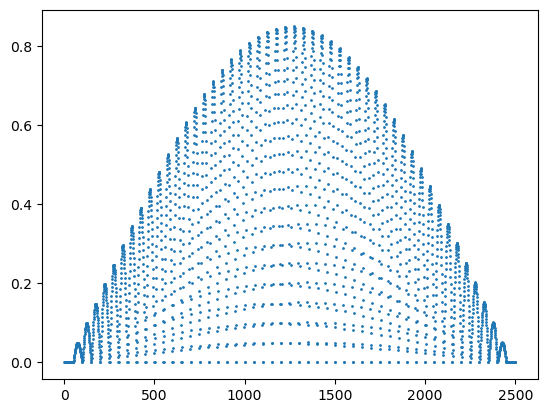

In [103]:
plt.scatter(x= list(range(1, 2501)), y = s, s=1)

In [41]:
np.max(t)

0.35499270085983325

In [43]:
np.min(t)

0.23753593376189136

In [34]:
t[30]

array([1.02353716, 1.04421755, 1.06481638, 1.08527351, 1.10552476,
       1.12550211, 1.14513394, 1.16434541, 1.1830589 , 1.2011945 ,
       1.21867068, 1.23540493, 1.25131459, 1.26631767, 1.28033377,
       1.29328501, 1.30509704, 1.31570004, 1.32502962, 1.33302783,
       1.33964399, 1.34483546, 1.34856835, 1.35081805, 1.35156961,
       1.35081805, 1.34856835, 1.34483546, 1.33964399, 1.33302783,
       1.32502962, 1.31570004, 1.30509704, 1.29328501, 1.28033377,
       1.26631767, 1.25131459, 1.23540493, 1.21867068, 1.2011945 ,
       1.1830589 , 1.16434541, 1.14513394, 1.12550211, 1.10552476,
       1.08527351, 1.06481638, 1.04421755, 1.02353716])

In [21]:
np.max(t)

1.3576687418553521

In [22]:
np.min(t)

0.8774468624991318

In [23]:
np.std(t)

0.11763286332816396

In [24]:
np.mean(t)

1.1614657621589344

In [3]:
def getBoundaries(order, i):
    x_coor = []
    y_coor = []
    z_coor = []
    # for i in range(hp.order2npix(order)):
    test = hp.boundaries(hp.order2nside(order), i, step=1)
    x_coor.extend(test[0])
    y_coor.extend(test[1])
    z_coor.extend(test[2])
    
    return x_coor, y_coor, z_coor

In [107]:
def getArcs(points, num_points):
    
    p1, p2, p3, p4= np.transpose(points)
    arc12 = great_circle_arc(p1, p2, num_points)
    arc23 = great_circle_arc(p2, p3, num_points)
    arc34 = great_circle_arc(p3, p4, num_points)
    arc41 = great_circle_arc(p4, p1, num_points)
    
    return arc12, arc23, arc34, arc41
    

In [178]:
def getPoints(arc12, arc23, arc34, arc41, num_points = 50):
    new_points = []
    all_arc_lengths = []
    
    #This function returns arcs both from top to bottom as well as side to side
    for i in range(num_points):
        arc = great_circle_arc(arc12[i], arc34[num_points - 1 - i], num_points)
        new_points.extend(arc)
        arc_lengths=[]
        for j in range(num_points-1):
            arc_lengths.append(angle_finder(arc[j], arc[j+1]))
        all_arc_lengths.append(arc_lengths)
    for i in range(num_points):
        arc = great_circle_arc(arc23[i], arc41[num_points -1 - i], num_points)
        new_points.extend(arc)
        arc_lengths=[]
        for j in range(num_points-1):
            arc_lengths.append(angle_finder(arc[j], arc[j+1]))
        all_arc_lengths.append(arc_lengths)


    

                
                    
    return np.array(new_points), np.array(all_arc_lengths)

In [179]:
def great_circle_arc(p1, p2, num_points=50):
    """Generates points along a great circle arc between two points."""

    p1_norm = p1 / np.linalg.norm(p1)
    p2_norm = p2 / np.linalg.norm(p2)
    points = []
    for i in range(num_points):
        t = i / (num_points - 1)
        # Linear interpolation and normalization
        pt = (1 - t) * p1_norm + t * p2_norm
        pt_norm = pt / np.linalg.norm(pt)
        points.append(pt_norm)
    return np.array(points)

In [7]:
def diff_in_angle(p1, p2):
   new_p1 = spherical(p1)
   new_p2 = spherical(p2)
   theta= abs(math.degrees(new_p1[0]) - math.degrees(new_p2[0]))
   phi = abs(math.degrees(new_p1[1]) - math.degrees(new_p2[1]))
   return theta, phi

In [8]:
def spherical(point):
    return np.arctan2(point[1], point[0]), np.arccos(point[2])

In [9]:
import math

def spherical_angle_diff(point1, point2):
    """
    Calculates the difference in theta and phi angles between two points on a sphere given their Cartesian coordinates.

    Args:
        point1: A tuple of length 3 representing the Cartesian coordinates of the first point.
        point2: A tuple of length 3 representing the Cartesian coordinates of the second point.

    Returns:
        A tuple containing the difference in theta and phi angles.
    """
    
    def to_spherical(point):
        x, y, z = point
        r = math.sqrt(x**2 + y**2 + z**2)
        theta = math.atan2(y, x)
        phi = math.acos(z / r)
        return theta, phi

    theta1, phi1 = to_spherical(point1)
    theta2, phi2 = to_spherical(point2)

    return (theta2 - theta1) *180/np.pi, (phi2 - phi1)*180/np.pi

In [15]:
def angle_finder(point1, point2):

    point1 = np.array(point1)
    point2 = np.array(point2)

    # Calculate the dot product of the two vectors
    dot_product = np.dot(point1, point2)

     # Ensure the value is within the valid range for arccos (-1 to 1)
    cos_theta = np.clip(dot_product, -1, 1)
    
    # Calculate the angle in radians using arccos
    angle = math.degrees(math.acos(cos_theta))

    return angle